In [18]:
# %load_ext autoreload
%autoreload 2
import interface
import matplotlib as mp
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
from cartopy.feature import OCEAN
from cartopy.util import add_cyclic_point
import matplotlib.animation as animation
from datetime import datetime

import IPython

In [28]:
m = interface.Model(datetime(1980, 1, 1))
while m.date < datetime(1981, 1, 1):
    IPython.display.clear_output(wait=True)
    print(m.date)
    m.step()

1980-12-31 23:20:00


In [29]:
dat = m.data

In [30]:
len(dat.time)

367

RuntimeError: Requested MovieWriter (ffmpeg) not available

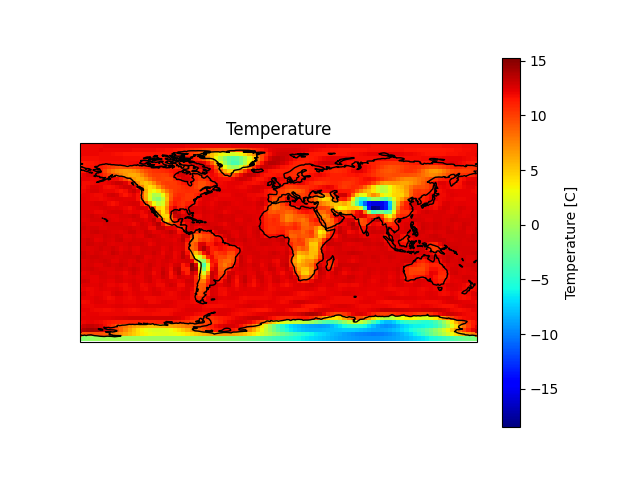

In [32]:
# %matplotlib ipympl
fig, ax = plt.subplots(subplot_kw=dict(projection=ccrs.PlateCarree()))
ax.set_title("Temperature")
ax.set_global()
ax.coastlines()
ax.add_feature(OCEAN)
data = dat.t[0, 0, :, :] - 273.15
cs = ax.pcolormesh(m.lon, m.lat, data, transform=ccrs.PlateCarree(), cmap="jet", shading="auto")
cbar = plt.colorbar(cs, label="Temperature [C]")

def update(frame):
    # data = dat.t[len(dat.time) - frame - 1, 1, :, :]
    data = dat.t[frame, 0, :, :] - 273.15
    cs.set_array(data)
    return cs,

ani = animation.FuncAnimation(fig=fig, func=update, frames=367, interval=30)
IPython.display.HTML(ani.to_html5_video())